In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import numpy as np

In [3]:
def dontCheck(url):
    if url.find("#")!=-1:
        return True
    if url.find("/wiki/")==-1:
        return True
    if url.find(".jpg")!=-1 or url.find(".ogg")!=-1 or url.find(".svg")!=-1 or url.find(".png")!=-1 or url.find(".jpeg")!=-1 or url.find(".gif")!=-1:
        return True
    if url.find("Help:")!=-1 or url.find(":")!=-1:
        return True
    if url.find("https")!=-1:
        return True
    if (url.find("commons") != -1 or url.find("_(identifier)") != -1):
        return True
        
    return False

In [4]:
def algorithm(subject, result):
    arr = np.array([])
    try:
        data = requests.get(subject)
        soup = BeautifulSoup(data.text, "html.parser")
        tags=soup.find(id="bodyContent").find_all("a")
        for tag in tags:
            s=tag.get('href', None)
            if (dontCheck(s)):
                continue
            ns = s[s.rfind("/")+1:]
            if s.find("https")==-1:
                s="https://en.wikipedia.org"+s
            if s.lower()==result.lower():
                print("Found")
                break
            arr = np.append(arr, ns)
        return arr
    except AttributeError:
        return arr

In [5]:
subject = "Wikipedia"
result = "Paris"

In [6]:
url = "https://en.wikipedia.org/wiki/"+subject
check_url = "https://en.wikipedia.org/wiki/"+result

In [7]:
arr = algorithm(url, check_url)
uarr, uind = np.unique(arr, return_index=True)

In [8]:
uarr[np.argsort(uind)]

array(['Main_Page', 'English_Wikipedia', 'Wikipedia_(disambiguation)',
       'Wikipedia_logo', 'Glyph', 'Writing_system', 'Online_encyclopedia',
       'Wikimedia_Foundation', 'Jimmy_Wales', 'Larry_Sanger',
       'Registered_user', 'Creative_Commons_license',
       'GNU_Free_Documentation_License', 'LAMP_(software_bundle)', 'OCLC',
       'Free_content', 'Volunteering', 'Wikipedia_community',
       'Open_collaboration', 'Wiki', 'MediaWiki', 'Reference_work',
       'List_of_most-visited_websites', 'Semrush', 'Similarweb',
       '501(c)(3)_organization', 'List_of_Wikipedias', 'Web_traffic',
       'Democratization_of_knowledge', 'Criticism_of_Wikipedia',
       'Gender_bias_on_Wikipedia', 'Geographical_bias_on_Wikipedia',
       'Global_South', 'Eurocentrism', 'Reliability_of_Wikipedia',
       'Wikipedia_and_fact-checking', 'Censorship_of_Wikipedia',
       'Breaking_news', 'History_of_Wikipedia', 'Nupedia', 'Bomis',
       'Web_portal', 'Richard_Stallman', 'Blend_word', 'Slashdot

In [9]:
basew = np.array([1])
weights = np.array([])
weights = np.append(weights, basew)

In [10]:
def new_weights(w, ind,k):
    toRet = (w*ind**(-1/k)) + 1
    return toRet

In [11]:
for i in range(1, len(uarr)):
    nw = new_weights(basew, i, 5)
    weights = np.append(weights, nw)

In [12]:
import matplotlib.pyplot as plt


In [13]:
len(weights)

647

In [14]:
weights[0]

np.float64(1.0)

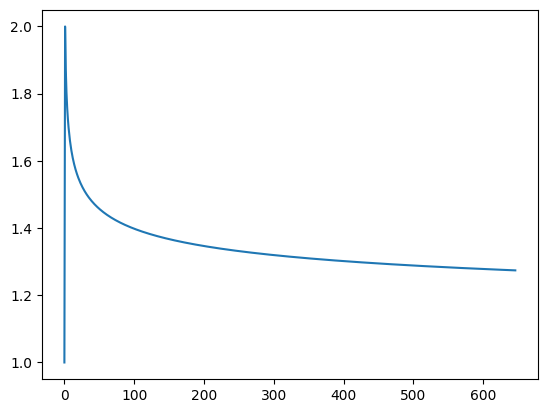

In [15]:
plt.plot(range(0, len(weights)), weights)
plt.show()
plt.close()


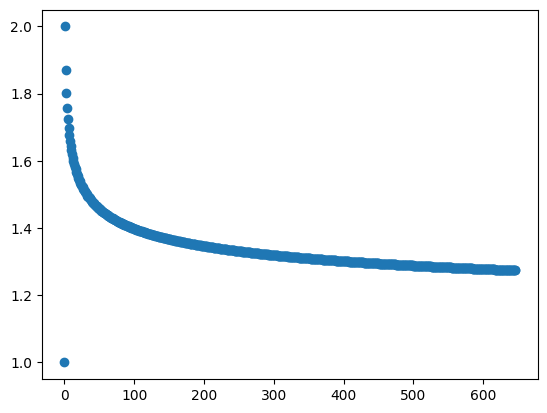

In [16]:
plt.scatter(range(len(weights)),weights)
plt.show()

In [17]:
def algo(subject):
    arr = np.array([])
    try:
        data = requests.get(subject)
        soup = BeautifulSoup(data.text, "html.parser")
        tags=soup.find(id="bodyContent").find_all("a")
        return len(tags)
    except AttributeError:
        return len(tags)

In [18]:
def countAll(arr):
    w2 = np.array([0])
    for ind, a in enumerate(arr):
        nUrl = "https://en.wikipedia.org/wiki/"+a
        nArr = algo(nUrl)
        w2 = np.append(w2, nArr)
        print(f"{ind}/{len(arr)}")
    return w2
    

In [19]:
# w2 = countAll(uarr)

In [20]:
plt.close()

In [21]:
#w2 = np.delete(w2, 1)

In [22]:
# plt.scatter(w2, weights)
# plt.xlabel('proper imp')
# plt.ylabel('relative imp')
# plt.title('Proper importance vs Relative importance')
# plt.show()

In [23]:
plt.close()

In [24]:
from multiprocessing import Process, Manager

In [25]:
def algo2(subject, q):
    subject = "https://en.wikipedia.org/wiki/"+subject
    try:
        data = requests.get(subject)
        soup = BeautifulSoup(data.text, "html.parser")
        tags=soup.find(id="bodyContent").find_all("a")
        q.put(len(tags))
    except AttributeError:
        return len(tags)

In [27]:
man = Manager()
queue = man.Queue()
process = [Process(target = algo2, args = (uarr[i], queue)) for i in range(0, len(uarr))]
for ind,p in enumerate(process):
    print(f"Starting {ind}")
    p.start()
for ind,p in enumerate(process):
    print("Joining", ind)
    p.join()

queue.qsize()


Starting 0
Starting 1
Starting 2
Starting 3
Starting 4
Starting 5
Starting 6
Starting 7
Starting 8
Starting 9
Starting 10
Starting 11
Starting 12
Starting 13
Starting 14
Starting 15
Starting 16
Starting 17
Starting 18
Starting 19
Starting 20
Starting 21
Starting 22
Starting 23
Starting 24
Starting 25
Starting 26
Starting 27
Starting 28
Starting 29
Starting 30
Starting 31
Starting 32
Starting 33
Starting 34
Starting 35
Starting 36
Starting 37
Starting 38
Starting 39
Starting 40
Starting 41
Starting 42
Starting 43
Starting 44
Starting 45
Starting 46
Starting 47
Starting 48
Starting 49
Starting 50
Starting 51
Starting 52
Starting 53
Starting 54
Starting 55
Starting 56
Starting 57
Starting 58
Starting 59
Starting 60
Starting 61
Starting 62
Starting 63
Starting 64
Starting 65
Starting 66
Starting 67
Starting 68
Starting 69
Starting 70
Starting 71
Starting 72
Starting 73
Starting 74
Starting 75
Starting 76
Starting 77
Starting 78
Starting 79
Starting 80
Starting 81
Starting 82
Starting 83
St

0